<h1 style="text-align: center">
Deep Learning HW1 </br>
</h1>

### Full Name: Yashar Moradi
### Student ID: 401210989

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer

Read Dataset and tokenize

In [4]:
data = pd.read_csv("BBBP.csv")
data = data.dropna(subset=['smiles'])

tokenizer = Tokenizer(char_level=True)
tokenizer.fit_on_texts(data['smiles'])

X = tokenizer.texts_to_matrix(data['smiles'], mode='binary')
y = data['p_np'].values

print(f'Number of Tokens : {X.shape[1]}')

Number of Tokens : 36


Analyze dataset and tokens frequent

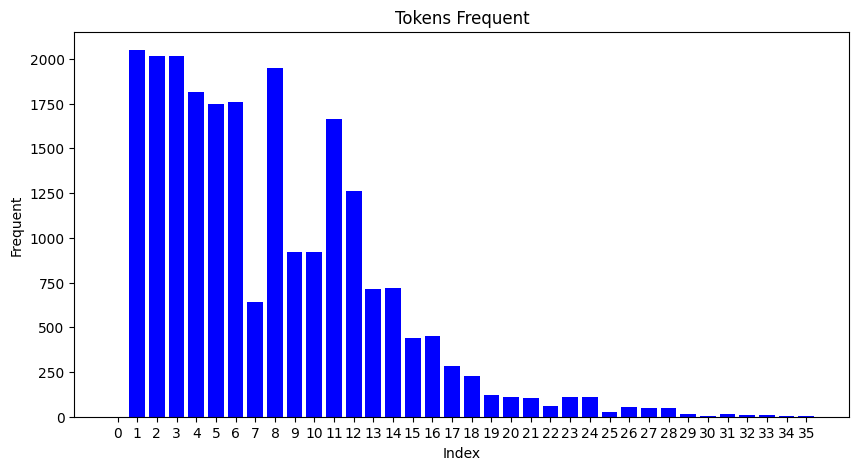

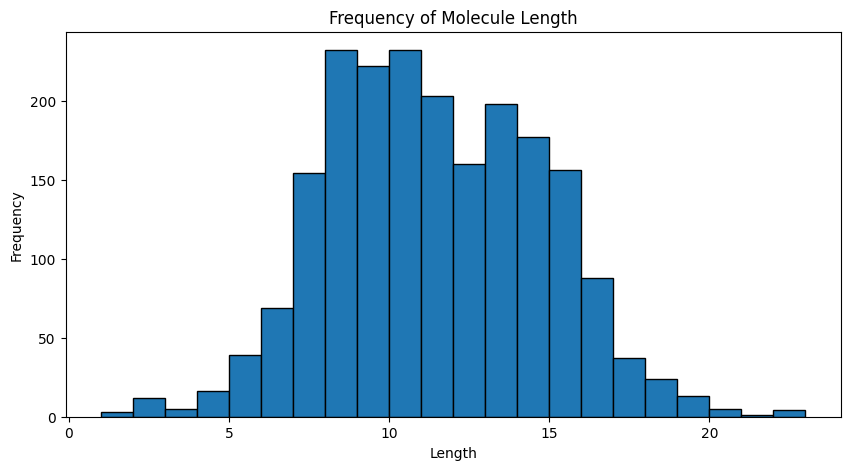

In [3]:
token_freq = np.sum(X, axis=0).astype(int)

plt.figure(figsize=(10, 5))
plt.bar(range(len(token_freq)), token_freq, color='blue')
plt.xlabel('Index')
plt.ylabel('Frequent')
plt.title('Tokens Frequent')
plt.xticks(range(len(token_freq)))
plt.show()

molecule_length = np.sum(X, axis=1).astype(int)

plt.figure(figsize=(10, 5))
plt.hist(molecule_length, bins=range(min(molecule_length), max(molecule_length) + 1), edgecolor='black')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.title('Frequency of Molecule Length')
plt.show()

FC Model

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2)

loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f'FC Model Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')

Epoch 1/100
41/41 [==============================] - 1s 7ms/step - loss: 0.5552 - accuracy: 0.7485 - val_loss: 0.4060 - val_accuracy: 0.8720
Epoch 2/100
41/41 [==============================] - 0s 4ms/step - loss: 0.4658 - accuracy: 0.8064 - val_loss: 0.3791 - val_accuracy: 0.8628
Epoch 3/100
41/41 [==============================] - 0s 4ms/step - loss: 0.4486 - accuracy: 0.8064 - val_loss: 0.3715 - val_accuracy: 0.8689
Epoch 4/100
41/41 [==============================] - 0s 4ms/step - loss: 0.4380 - accuracy: 0.8117 - val_loss: 0.3639 - val_accuracy: 0.8689
Epoch 5/100
41/41 [==============================] - 0s 3ms/step - loss: 0.4289 - accuracy: 0.8171 - val_loss: 0.3642 - val_accuracy: 0.8720
Epoch 6/100
41/41 [==============================] - 0s 8ms/step - loss: 0.4256 - accuracy: 0.8163 - val_loss: 0.3627 - val_accuracy: 0.8720
Epoch 7/100
41/41 [==============================] - 0s 7ms/step - loss: 0.4208 - accuracy: 0.8178 - val_loss: 0.3539 - val_accuracy: 0.8689
Epoch 8/100
4

LSTM Model

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], 1)))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=200, batch_size=32, validation_split=0.2)

y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)
print(f"LSTM Model Test Accuracy: {accuracy}")

Epoch 1/200
41/41 [==============================] - 4s 17ms/step - loss: 0.5997 - accuracy: 0.7431 - val_loss: 0.5329 - val_accuracy: 0.7896
Epoch 2/200
41/41 [==============================] - 0s 6ms/step - loss: 0.5449 - accuracy: 0.7569 - val_loss: 0.5004 - val_accuracy: 0.7896
Epoch 3/200
41/41 [==============================] - 0s 7ms/step - loss: 0.5486 - accuracy: 0.7569 - val_loss: 0.5284 - val_accuracy: 0.7713
Epoch 4/200
41/41 [==============================] - 0s 6ms/step - loss: 0.5328 - accuracy: 0.7614 - val_loss: 0.4566 - val_accuracy: 0.7927
Epoch 5/200
41/41 [==============================] - 0s 7ms/step - loss: 0.5246 - accuracy: 0.7599 - val_loss: 0.4635 - val_accuracy: 0.7927
Epoch 6/200
41/41 [==============================] - 0s 7ms/step - loss: 0.5209 - accuracy: 0.7607 - val_loss: 0.4660 - val_accuracy: 0.7896
Epoch 7/200
41/41 [==============================] - 0s 7ms/step - loss: 0.5268 - accuracy: 0.7561 - val_loss: 0.4793 - val_accuracy: 0.7896
Epoch 8/200


BiLSTM Model

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

model = Sequential()
model.add(Bidirectional(LSTM(50,  input_shape=(X_train.shape[1], 1))))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=200, batch_size=32, validation_split=0.2)

y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)
print(f"BiLSTM Model Test Accuracy: {accuracy}")

Epoch 1/200
41/41 [==============================] - 7s 58ms/step - loss: 0.5917 - accuracy: 0.7477 - val_loss: 0.5361 - val_accuracy: 0.7896
Epoch 2/200
41/41 [==============================] - 0s 12ms/step - loss: 0.5386 - accuracy: 0.7591 - val_loss: 0.5229 - val_accuracy: 0.7134
Epoch 3/200
41/41 [==============================] - 0s 11ms/step - loss: 0.5402 - accuracy: 0.7508 - val_loss: 0.4765 - val_accuracy: 0.7896
Epoch 4/200
41/41 [==============================] - 0s 9ms/step - loss: 0.5244 - accuracy: 0.7622 - val_loss: 0.4753 - val_accuracy: 0.7927
Epoch 5/200
41/41 [==============================] - 1s 13ms/step - loss: 0.5243 - accuracy: 0.7607 - val_loss: 0.4603 - val_accuracy: 0.7957
Epoch 6/200
41/41 [==============================] - 0s 10ms/step - loss: 0.5178 - accuracy: 0.7622 - val_loss: 0.4653 - val_accuracy: 0.7957
Epoch 7/200
41/41 [==============================] - 0s 12ms/step - loss: 0.5148 - accuracy: 0.7668 - val_loss: 0.4683 - val_accuracy: 0.7957
Epoch 8

FC Model with Cross Validation

In [16]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

croos_validation_accuracy = []

for train_index, test_index in kfold.split(X, y):

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    model = Sequential()
    model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2)

    loss, acc = model.evaluate(X_test_scaled, y_test)

    croos_validation_accuracy.append(acc)

accuracy = np.mean(croos_validation_accuracy)
print(f'FC Model with Cross Validation Accuracy: {accuracy:.4f}')

Epoch 1/100
41/41 [==============================] - 1s 7ms/step - loss: 0.5895 - accuracy: 0.7172 - val_loss: 0.3449 - val_accuracy: 0.9665
Epoch 2/100
41/41 [==============================] - 0s 3ms/step - loss: 0.5052 - accuracy: 0.7797 - val_loss: 0.2971 - val_accuracy: 0.9604
Epoch 3/100
41/41 [==============================] - 0s 4ms/step - loss: 0.4872 - accuracy: 0.7782 - val_loss: 0.2671 - val_accuracy: 0.9695
Epoch 4/100
41/41 [==============================] - 0s 3ms/step - loss: 0.4774 - accuracy: 0.7851 - val_loss: 0.2456 - val_accuracy: 0.9848
Epoch 5/100
41/41 [==============================] - 0s 5ms/step - loss: 0.4695 - accuracy: 0.7904 - val_loss: 0.2589 - val_accuracy: 0.9665
Epoch 6/100
41/41 [==============================] - 0s 6ms/step - loss: 0.4621 - accuracy: 0.7866 - val_loss: 0.2517 - val_accuracy: 0.9665
Epoch 7/100
41/41 [==============================] - 0s 6ms/step - loss: 0.4560 - accuracy: 0.7912 - val_loss: 0.2377 - val_accuracy: 0.9848
Epoch 8/100
4

LSTM Model with Cross Validation

In [14]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

croos_validation_accuracy = []

for train_index, test_index in kfold.split(X_scaled, y):

    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]

    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
    X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

    model = Sequential()
    model.add(LSTM(50, input_shape=(X_train.shape[1], 1)))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    model.fit(X_train, y_train, epochs=200, batch_size=32, validation_split=0.2)

    y_pred = (model.predict(X_test) > 0.5).astype(int)
    acc = accuracy_score(y_test, y_pred)
    croos_validation_accuracy.append(acc)

accuracy = np.mean(croos_validation_accuracy)
print(f'LSTM Model with Cross Validation Accuracy: {accuracy:.4f}')

Epoch 1/200
41/41 [==============================] - 4s 21ms/step - loss: 0.6180 - accuracy: 0.7012 - val_loss: 0.3675 - val_accuracy: 0.9543
Epoch 2/200
41/41 [==============================] - 0s 5ms/step - loss: 0.5641 - accuracy: 0.7233 - val_loss: 0.3212 - val_accuracy: 0.9421
Epoch 3/200
41/41 [==============================] - 0s 6ms/step - loss: 0.5579 - accuracy: 0.7332 - val_loss: 0.2286 - val_accuracy: 0.9482
Epoch 4/200
41/41 [==============================] - 0s 5ms/step - loss: 0.5583 - accuracy: 0.7332 - val_loss: 0.2738 - val_accuracy: 0.9055
Epoch 5/200
41/41 [==============================] - 0s 6ms/step - loss: 0.5480 - accuracy: 0.7454 - val_loss: 0.3857 - val_accuracy: 0.9055
Epoch 6/200
41/41 [==============================] - 0s 7ms/step - loss: 0.5587 - accuracy: 0.7096 - val_loss: 0.2333 - val_accuracy: 0.9268
Epoch 7/200
41/41 [==============================] - 0s 7ms/step - loss: 0.5531 - accuracy: 0.7477 - val_loss: 0.3143 - val_accuracy: 0.9024
Epoch 8/200


BiLSTM Model with Cross Validation

In [17]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

croos_validation_accuracy = []

for train_index, test_index in kfold.split(X_scaled, y):

    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]

    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
    X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

    model = Sequential()
    model.add(Bidirectional(LSTM(50,  input_shape=(X_train.shape[1], 1))))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

    y_pred = (model.predict(X_test) > 0.5).astype(int)
    acc = accuracy_score(y_test, y_pred)
    croos_validation_accuracy.append(acc)

accuracy = np.mean(croos_validation_accuracy)
print(f'BiLSTM Model with Cross Validation Accuracy: {accuracy:.4f}')

Epoch 1/100
41/41 [==============================] - 5s 36ms/step - loss: 0.6081 - accuracy: 0.7005 - val_loss: 0.4093 - val_accuracy: 0.9695
Epoch 2/100
41/41 [==============================] - 0s 10ms/step - loss: 0.5634 - accuracy: 0.7233 - val_loss: 0.3535 - val_accuracy: 0.9421
Epoch 3/100
41/41 [==============================] - 0s 10ms/step - loss: 0.5573 - accuracy: 0.7302 - val_loss: 0.3149 - val_accuracy: 0.9909
Epoch 4/100
41/41 [==============================] - 0s 10ms/step - loss: 0.5550 - accuracy: 0.7332 - val_loss: 0.2616 - val_accuracy: 0.9482
Epoch 5/100
41/41 [==============================] - 0s 11ms/step - loss: 0.5540 - accuracy: 0.7431 - val_loss: 0.3117 - val_accuracy: 0.9268
Epoch 6/100
41/41 [==============================] - 0s 10ms/step - loss: 0.5486 - accuracy: 0.7401 - val_loss: 0.2975 - val_accuracy: 0.9299
Epoch 7/100
41/41 [==============================] - 0s 11ms/step - loss: 0.5477 - accuracy: 0.7355 - val_loss: 0.3055 - val_accuracy: 0.9268
Epoch 

 در مدل عادی جریان داده ها یک طرفه است ولی در مدل دوم ، جریان داده دو طرفه است و هم از گذشته به آینده و هم از آینده به گذشته است و باعث می شود دقت بیشتری داشته باشد ولی زمان آموزش آن هم افزایش می یابد